In [1]:
from clustering.preprocess import Preprocess
from clustering.kmeans import KMeansClustering
from clustering.lda import LDA
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
data = Preprocess.open_pickle("F:\Development\smart_rejector_for_hate_speech\/twitter_data.pkl")
filtered_data = Preprocess.filter_waseem_hovy(X=data, label='sexism')
tweets = [x['text'] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 16089
INFO:root:After applying filters: 3117
INFO:root:Data length after removing invalid tweets: 582
INFO:root:Explained variance of the SVD step: 44%


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


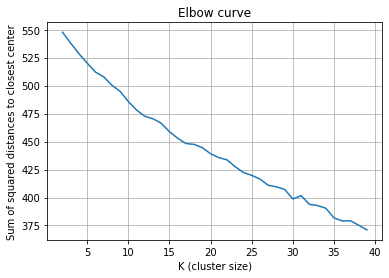

In [3]:
%matplotlib inline
km.plot_elbow_curve(max_k=50, X=X)

In [ ]:
%matplotlib inline
# Higher values are better, when clusters are dense and well separated
km.plot_calinski_harabasz_analysis(max_k=50, X=X)

In [ ]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=50, X=X)

In [ ]:
%matplotlib inline
# Values close to zero indicate a better partition
km.plot_davies_bouldin_score_analysis(max_k=50, X=X)

In [ ]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

In [ ]:
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=5)

In [ ]:
lda = LDA()
X = lda.fit_tf(X=cleaned_data)
pred = lda.fit_lda(X=X, n_components=2)
# Lower values are better
# Perplexity indicates how well the probability model predicts the samples
lda.plot_perplexity(max_n=100, X=X)

In [ ]:
pred = lda.fit_lda(X=X, n_components=10)
lda.print_top_terms()